<h2><center> Welcome to the Faulty Air-Quality Sensor Challenge</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1hSOAfRhJ_jo-MZAjq81VYJu5bZNL7EjD" width = "800" height = '500'/>

*About the problem*
> AirQo’s air quality sensing network has more than 120 low-cost devices deployed across Uganda; in most cases, these devices are deployed in unmonitored or perilous environments. These low-cost electronic devices are susceptible to breakdown caused by communication malfunction, aging, wear and tear, manufacturing deficiencies, incorrect calibration, mishandling and other external environmental factors. Faults lead to data inaccuracies and data loss, which impacts decisions and policies that could significantly impact people’s lives. 

*Objective of this challenge*
> In this challenge, your task is to develop a binary clasification model to identify faulty sensors, regardless of the device type. The model will be used by AirQo to automatically flag devices that have faulty readings. 

Device failure detection and monitoring is critical to AirQo’s work; faulty devices need to be identified, isolated and fixed or replaced with urgency



## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Missing values and duplicates](#Missing)
5. [Outliers](#Outliers)
6. [Feature engineering](#Engineering)
7. [Date features EDA](#Dates)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Making predictions of the test set and creating a submission file](#Predictions)
12. [TO DOs](#Tips)

<a name="Libraries"></a>
## 1. Importing libraries


In [472]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a name="Data"></a>
## 2. Loading data

In [429]:
# Load files
train = pd.read_csv('train.csv', parse_dates = ['Datetime'])
test = pd.read_csv('test.csv', parse_dates = ['Datetime'])
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

ID            Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
0  ID_QF0ZTQJ2SF5Q 2021-11-03 04:06:31       52.58000       49.52000   
1  ID_4GTK689CNX5S 2021-11-08 18:43:23       35.25000       33.40000   
2  ID_DL7VVKW9U7XQ 2021-11-07 09:50:33       19.18000       23.50000   
3  ID_6XQOMBXM2DG3 2022-01-01 18:55:15       19.40000       15.48000   
4  ID_UQZW9ISJY9QE 2021-11-05 22:23:48       38.30000       34.77000   

   Temperature  Relative_Humidity  Offset_fault  
0     17.40000           96.00000             0  
1     25.00000           75.00000             0  
2     24.90000           75.00000             0  
3     24.90000           70.00000             0  
4     20.90000           89.00000             0

In [430]:
# Preview test dataset
test.head()

ID            Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
0  ID_STL3V9B2OU12 2022-01-28 08:49:41       90.75000      114.78000   
1  ID_U2EKAY4SGA94 2022-02-16 21:30:17       56.03000       52.18000   
2  ID_UJFLEWQR0U4N 2022-01-24 17:57:18      387.35000      346.73000   
3  ID_S2C2GPGA4R5I 2022-01-31 07:07:09       63.17000       83.85000   
4  ID_5V2C2ZL221H8 2022-01-31 00:37:05       69.23000       53.07000   

   Temperature  Relative_Humidity  
0     22.20000           56.00000  
1          NaN                NaN  
2     28.10000           63.00000  
3     21.60000           82.00000  
4     22.70000           80.00000

In [431]:
# Preview sample submission file
samplesubmission.head()

ID  Offset_fault
0  ID_STL3V9B2OU12             0
1  ID_U2EKAY4SGA94             0
2  ID_UJFLEWQR0U4N             0
3  ID_S2C2GPGA4R5I             0
4  ID_5V2C2ZL221H8             0

In [432]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((297177, 7), (127361, 6), (127361, 2))

<a name="Statistics"></a>
## 3. Statistical summaries

In [433]:
train.describe()

Sensor1_PM2.5  Sensor2_PM2.5  Temperature  Relative_Humidity  \
count   293563.00000   293563.00000 293628.00000       293628.00000   
mean        40.75120       38.18302     23.31655           78.65362   
std         28.52618       28.64776      3.83697           14.77272   
min         -9.45000       -9.70000     16.70000           27.00000   
25%         22.43000       19.52000     20.40000           68.00000   
50%         36.47000       33.72000     21.90000           84.00000   
75%         49.42000       47.57000     26.30000           91.00000   
max        997.96000      997.26000     34.90000           99.00000   

       Offset_fault  
count  297177.00000  
mean        0.37107  
std         0.48309  
min         0.00000  
25%         0.00000  
50%         0.00000  
75%         1.00000  
max         1.00000

In [434]:
# Train statistical summary
train.describe(include = 'all')

ID             Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
count            297177               297177   293563.00000   293563.00000   
unique           297177               293751            NaN            NaN   
top     ID_QF0ZTQJ2SF5Q  2021-11-26 17:23:00            NaN            NaN   
freq                  1                    3            NaN            NaN   
first               NaN  2021-10-15 16:00:31            NaN            NaN   
last                NaN  2022-01-21 07:34:57            NaN            NaN   
mean                NaN                  NaN       40.75120       38.18302   
std                 NaN                  NaN       28.52618       28.64776   
min                 NaN                  NaN       -9.45000       -9.70000   
25%                 NaN                  NaN       22.43000       19.52000   
50%                 NaN                  NaN       36.47000       33.72000   
75%                 NaN                  NaN       49.42000       47.57000   
max                 NaN                  NaN      997.96000      997.26000   

        Temperature  Relative_Humidity  Offset_fault  
count  293628.00000       293628.00000  297177.00000  
unique          NaN                NaN           NaN  
top             NaN                NaN           NaN  
freq            NaN                NaN           NaN  
first           NaN                NaN           NaN  
last            NaN                NaN           NaN  
mean       23.31655           78.65362       0.37107  
std         3.83697           14.77272       0.48309  
min        16.70000           27.00000       0.00000  
25%        20.40000           68.00000       0.00000  
50%        21.90000           84.00000       0.00000  
75%        26.30000           91.00000       1.00000  
max        34.90000           99.00000       1.00000

From the above statistical summary, we can deduce some of the following insights:
 - The train data provided ranges from *2021-10-15 16:00:34* to *2022-01-21 07:34:57*
 - There is a high correlation between Sensor1_PM2.5	and Sensor2_PM2.5
 - Minimum recorded temperature is *16.70000* and a maximum *34.90000*

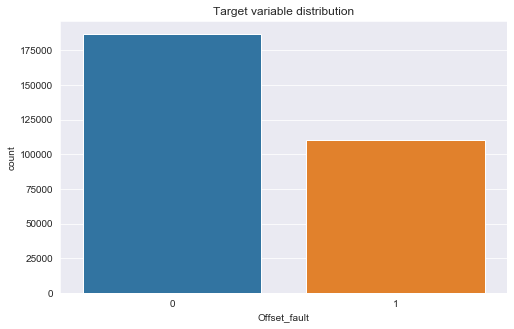

In [435]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["Offset_fault"])
plt.title('Target variable distribution')
plt.show()

The target variable is not well balanced.
Some of the techniques to handle imbalanceness include:
- Smote
- Oversampling
- Undersampling ...

<a name="Missing"></a>
## 4. Missing values and duplicates

In [436]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any() 

(True, True)

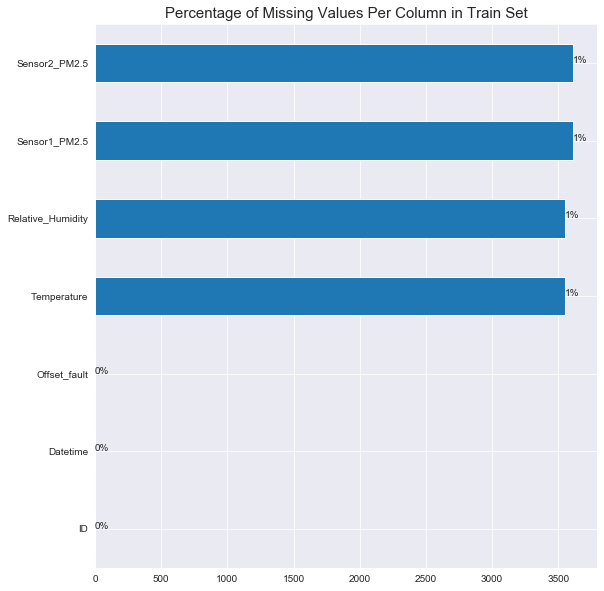

In [437]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Suggestions on how to handle missing values:
 - Fill in missing values with mode, mean, median..
 - Drop Missing datapoints with missing values
 - Fill in with a large number e.g -999999

In [438]:
train.head(10)

ID            Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
0  ID_QF0ZTQJ2SF5Q 2021-11-03 04:06:31       52.58000       49.52000   
1  ID_4GTK689CNX5S 2021-11-08 18:43:23       35.25000       33.40000   
2  ID_DL7VVKW9U7XQ 2021-11-07 09:50:33       19.18000       23.50000   
3  ID_6XQOMBXM2DG3 2022-01-01 18:55:15       19.40000       15.48000   
4  ID_UQZW9ISJY9QE 2021-11-05 22:23:48       38.30000       34.77000   
5  ID_1A9CVG5BBKRT 2022-01-13 09:07:32       27.58000       18.92000   
6  ID_O598XNF3QQ7H 2021-12-18 02:25:06       43.62000       34.62000   
7  ID_MUEQIKPY6X5O 2021-11-11 04:18:59      104.35000       98.00000   
8  ID_YOGZ8Q8O97ON 2021-12-19 06:17:43       19.22000       13.25000   
9  ID_FR804PILRAZ0 2022-01-01 16:19:02        2.02000        5.22000   

   Temperature  Relative_Humidity  Offset_fault  
0     17.40000           96.00000             0  
1     25.00000           75.00000             0  
2     24.90000           75.00000             0  
3     24.90000           70.00000             0  
4     20.90000           89.00000             0  
5     26.10000           57.00000             1  
6     20.60000           86.00000             1  
7     20.30000           94.00000             0  
8     19.30000           92.00000             1  
9     27.10000           66.00000             0

In [439]:
train.isna().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [440]:
# train['Sensor1_PM2.5'].mean()
train['Sensor1_PM2.5'] = train['Sensor1_PM2.5'].fillna(np.around(train['Sensor1_PM2.5'].mean(), decimals=4))
train['Sensor2_PM2.5'] = train['Sensor2_PM2.5'].fillna(np.around(train['Sensor2_PM2.5'].mean(), decimals=4))
train['Temperature'] = train['Temperature'].fillna(np.around(train['Temperature'].mean(), decimals=4))
train['Relative_Humidity'] = train['Relative_Humidity'].fillna(np.around(train['Relative_Humidity'].mean(), decimals=4))

In [441]:
test.isna().sum()

ID                       0
Datetime                 0
Sensor1_PM2.5            0
Sensor2_PM2.5            0
Temperature          88090
Relative_Humidity    88090
dtype: int64

In [442]:
test['Temperature'] = test['Temperature'].fillna(np.around(test['Temperature'].mean(), decimals=4))
test['Relative_Humidity'] = test['Relative_Humidity'].fillna(np.around(test['Relative_Humidity'].mean(), decimals=4))

In [443]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

No duplictes 

<a name="Outliers"></a>
## 5. Outliers

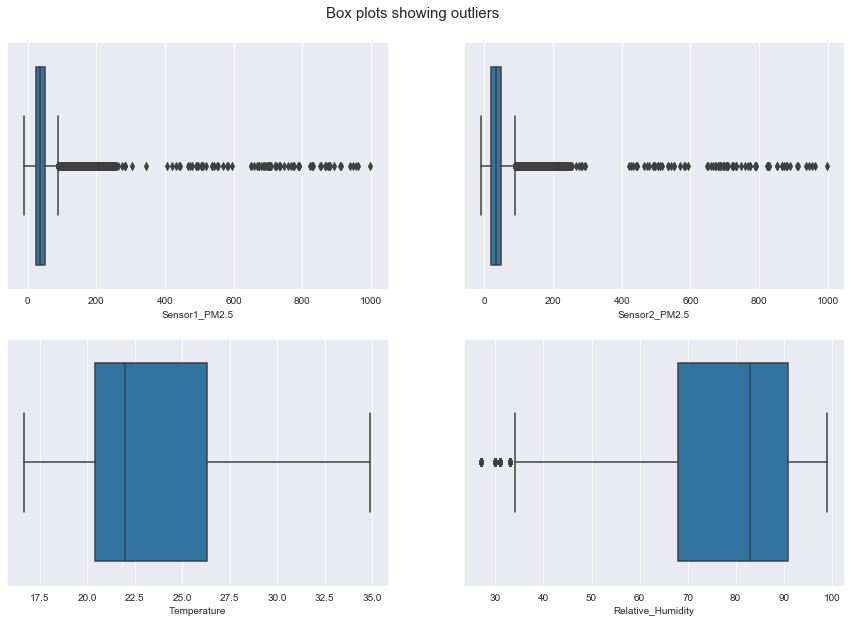

In [444]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5',	'Sensor2_PM2.5','Temperature',	'Relative_Humidity']):
  sns.boxplot(train[name], ax = ax)

Outliers are those data points which differs significantly from other observations present in given dataset.

Suggestions on how to handle outliers:
 - Transforming the outliers by scaling - log transformation, box-cox transformation ...
 - Dropping outliers
 - Imputation by replacing outliers with mean, median ...


In [445]:
rob_scaler = RobustScaler()
min_scaler = MinMaxScaler()

train[['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']] = rob_scaler.fit_transform(train[['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']])
test[['Temperature','Relative_Humidity']] = min_scaler.fit_transform(test[['Temperature','Relative_Humidity']])
test[['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']] = rob_scaler.fit_transform(test[['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']])

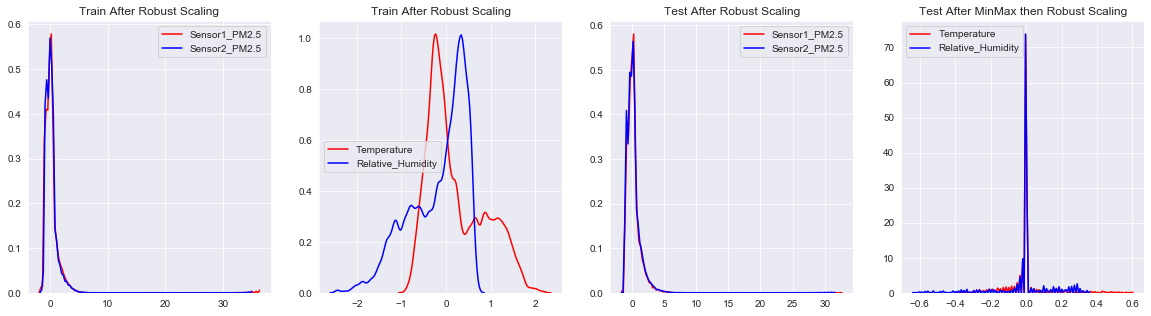

In [446]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Train After Robust Scaling')
sns.kdeplot(train['Sensor1_PM2.5'], ax = ax1, color ='r')
sns.kdeplot(train['Sensor2_PM2.5'], ax = ax1, color ='b')

ax2.set_title('Train After Robust Scaling')
sns.kdeplot(train['Temperature'], ax = ax2, color ='red')
sns.kdeplot(train['Relative_Humidity'], ax = ax2, color ='blue')

ax3.set_title('Test After Robust Scaling')
sns.kdeplot(test['Sensor1_PM2.5'], ax = ax3, color ='r')
sns.kdeplot(test['Sensor2_PM2.5'], ax = ax3, color ='b')

ax4.set_title('Test After MinMax then Robust Scaling')
sns.kdeplot(test['Temperature'], ax = ax4, color ='red')
sns.kdeplot(test['Relative_Humidity'], ax = ax4, color ='blue')

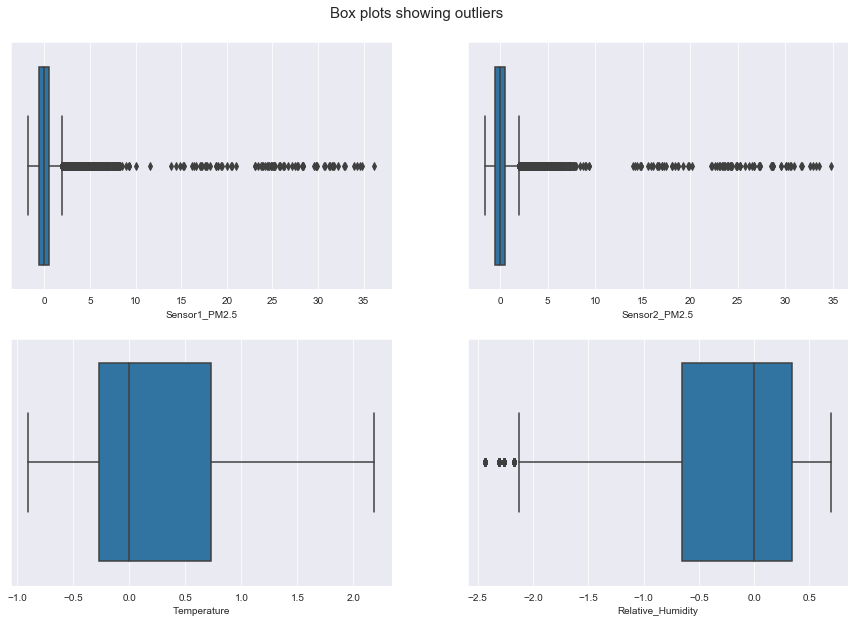

In [447]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']):
  sns.boxplot(train[name], ax = ax)

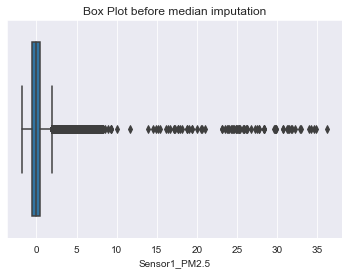

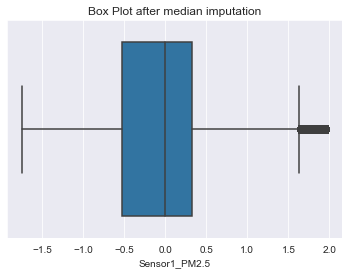

In [448]:
#median imputation for Sensor1_PM2.5
sns.boxplot(train['Sensor1_PM2.5'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Sensor1_PM2.5'].quantile(0.25)
q3 = train['Sensor1_PM2.5'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sensor1_PM2.5'])
for i in train['Sensor1_PM2.5']:
    if i > Upper_tail or i < Lower_tail:
            train['Sensor1_PM2.5'] = train['Sensor1_PM2.5'].replace(i, med)
sns.boxplot(train['Sensor1_PM2.5'])
plt.title("Box Plot after median imputation")
plt.show()            

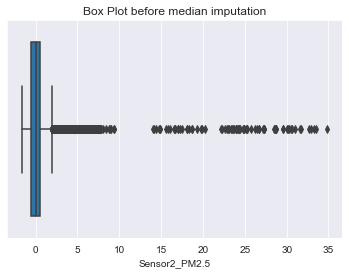

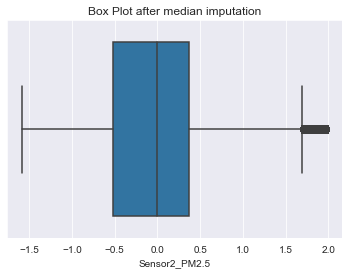

In [449]:
 #median imputation Sensor2_PM2.5
sns.boxplot(train['Sensor2_PM2.5'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Sensor2_PM2.5'].quantile(0.25)
q3 = train['Sensor2_PM2.5'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sensor2_PM2.5'])
for i in train['Sensor2_PM2.5']:
    if i > Upper_tail or i < Lower_tail:
            train['Sensor2_PM2.5'] = train['Sensor2_PM2.5'].replace(i, med)
sns.boxplot(train['Sensor2_PM2.5'])
plt.title("Box Plot after median imputation")
plt.show() 

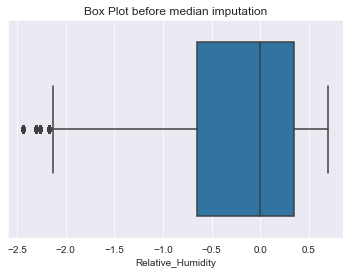

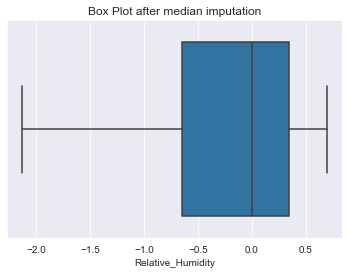

In [450]:
#median imputation for Sensor1_PM2.5
sns.boxplot(train['Relative_Humidity'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Relative_Humidity'].quantile(0.25)
q3 = train['Relative_Humidity'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Relative_Humidity'])
for i in train['Relative_Humidity']:
    if i > Upper_tail or i < Lower_tail:
            train['Relative_Humidity'] = train['Relative_Humidity'].replace(i, med)
sns.boxplot(train['Relative_Humidity'])
plt.title("Box Plot after median imputation")
plt.show()            

<a name="Engineering"></a>
## 6. Feature engineering

In [451]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime

dt_fe = FeatureEngineering_DateTime()

dt_fe.fit(train, datetime_variables=['Datetime'], prefix = 'Datetime:')
dt_fe.fit(test, datetime_variables=['Datetime'], prefix = 'Datetime:')

train = dt_fe.transform(train)
test = dt_fe.transform(test)
train.head()

ID            Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
0  ID_QF0ZTQJ2SF5Q 2021-11-03 04:06:31        0.59503        0.55997   
1  ID_4GTK689CNX5S 2021-11-08 18:43:23       -0.05721       -0.02240   
2  ID_DL7VVKW9U7XQ 2021-11-07 09:50:33       -0.66202       -0.38006   
3  ID_6XQOMBXM2DG3 2022-01-01 18:55:15       -0.65374       -0.66980   
4  ID_UQZW9ISJY9QE 2021-11-05 22:23:48        0.05758        0.02710   

   Temperature  Relative_Humidity  Offset_fault  Datetime:year  \
0     -0.77966            0.56522             0           2021   
1      0.50847           -0.34783             0           2021   
2      0.49153           -0.34783             0           2021   
3      0.49153           -0.56522             0           2022   
4     -0.18644            0.26087             0           2021   

   Datetime:quarter  Datetime:month  ...  Datetime:is_quarter_end  \
0                 4              11  ...                    False   
1                 4              11  ...                    False   
2                 4              11  ...                    False   
3                 1               1  ...                    False   
4                 4              11  ...                    False   

   Datetime:is_quarter_start  Datetime:is_year_end  Datetime:is_year_start  \
0                      False                 False                   False   
1                      False                 False                   False   
2                      False                 False                   False   
3                       True                 False                    True   
4                      False                 False                   False   

   Datetime:time  Datetime:hour  Datetime:minute  Datetime:second  \
0       04:06:31              4                6               31   
1       18:43:23             18               43               23   
2       09:50:33              9               50               33   
3       18:55:15             18               55               15   
4       22:23:48             22               23               48   

   Datetime:is_weekend  Datetime:day_part  
0                    0               dawn  
1                    0            evening  
2                    1       late morning  
3                    1            evening  
4                    0              night  

[5 rows x 26 columns]

In [452]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ID                         297177 non-null  object        
 1   Datetime                   297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5              297177 non-null  float64       
 3   Sensor2_PM2.5              297177 non-null  float64       
 4   Temperature                297177 non-null  float64       
 5   Relative_Humidity          297177 non-null  float64       
 6   Offset_fault               297177 non-null  int64         
 7   Datetime:year              297177 non-null  int64         
 8   Datetime:quarter           297177 non-null  int64         
 9   Datetime:month             297177 non-null  int64         
 10  Datetime:day               297177 non-null  int64         
 11  Datetime:day_of_week       297177 non-null  int64   

In [453]:
train.drop(['Datetime'],axis=1,inplace=True) 
test.drop(['Datetime'],axis=1,inplace=True)

train.drop(['Datetime:time'],axis=1,inplace=True) 
test.drop(['Datetime:time'],axis=1,inplace=True)

train.drop(['Datetime:day_part'],axis=1,inplace=True) 
test.drop(['Datetime:day_part'],axis=1,inplace=True)

train.drop(['Datetime:is_year_end'],axis=1,inplace=True) 
test.drop(['Datetime:is_year_end'],axis=1,inplace=True)

train.drop(['Datetime:second'],axis=1,inplace=True) 
test.drop(['Datetime:second'],axis=1,inplace=True)

# train.drop(['Datetime:day'],axis=1,inplace=True) 
# test.drop(['Datetime:day'],axis=1,inplace=True)

train.drop(['Datetime:minute'],axis=1,inplace=True) 
test.drop(['Datetime:minute'],axis=1,inplace=True)

train.drop(['Datetime:day_of_week'],axis=1,inplace=True) 
test.drop(['Datetime:day_of_week'],axis=1,inplace=True)

train.drop(['Datetime:year'],axis=1,inplace=True) 
test.drop(['Datetime:year'],axis=1,inplace=True)

train.drop(['Datetime:quarter'],axis=1,inplace=True) 
test.drop(['Datetime:quarter'],axis=1,inplace=True)

train.drop(['Datetime:is_quarter_start'],axis=1,inplace=True) 
test.drop(['Datetime:is_quarter_start'],axis=1,inplace=True)

train.drop(['Datetime:is_quarter_end'],axis=1,inplace=True) 
test.drop(['Datetime:is_quarter_end'],axis=1,inplace=True)

train.drop(['Datetime:is_year_start'],axis=1,inplace=True) 
test.drop(['Datetime:is_year_start'],axis=1,inplace=True)

train.drop(['Datetime:is_weekend'],axis=1,inplace=True) 
test.drop(['Datetime:is_weekend'],axis=1,inplace=True)

train.drop(['Datetime:is_month_end'],axis=1,inplace=True) 
test.drop(['Datetime:is_month_end'],axis=1,inplace=True)

In [454]:
train

ID  Sensor1_PM2.5  Sensor2_PM2.5  Temperature  \
0       ID_QF0ZTQJ2SF5Q        0.59503        0.55997     -0.77966   
1       ID_4GTK689CNX5S       -0.05721       -0.02240      0.50847   
2       ID_DL7VVKW9U7XQ       -0.66202       -0.38006      0.49153   
3       ID_6XQOMBXM2DG3       -0.65374       -0.66980      0.49153   
4       ID_UQZW9ISJY9QE        0.05758        0.02710     -0.18644   
...                 ...            ...            ...          ...   
297172  ID_AQFTZIKVX2QL       -0.01393        0.13548      1.11864   
297173  ID_2X0AJPWOMJNA        0.50245        0.23880     -0.06780   
297174  ID_0OAQMV7USTI4        0.63643        0.40499     -0.30508   
297175  ID_Y8FDAO06VXGJ        0.00000        0.00000     -0.23729   
297176  ID_3XEXH72VWK4J        0.28227        0.09935     -0.79661   

        Relative_Humidity  Offset_fault  Datetime:month  Datetime:day  \
0                 0.56522             0              11             3   
1                -0.34783             0              11             8   
2                -0.34783             0              11             7   
3                -0.56522             0               1             1   
4                 0.26087             0              11             5   
...                   ...           ...             ...           ...   
297172           -0.91304             0              11            19   
297173            0.13043             1              11            22   
297174            0.47826             1              11             5   
297175            0.43478             0              11            23   
297176            0.52174             1              11            23   

        Datetime:day_of_year  Datetime:weekofyear  Datetime:is_month_start  \
0                        307                   44                    False   
1                        312                   45                    False   
2                        311                   44                    False   
3                          1                   52                     True   
4                        309                   44                    False   
...                      ...                  ...                      ...   
297172                   323                   46                    False   
297173                   326                   47                    False   
297174                   309                   44                    False   
297175                   327                   47                    False   
297176                   327                   47                    False   

        Datetime:hour  
0                   4  
1                  18  
2                   9  
3                  18  
4                  22  
...               ...  
297172             12  
297173              1  
297174              1  
297175             22  
297176              6  

[297177 rows x 12 columns]

<a name="Dates"></a>
## 7. Date features EDA

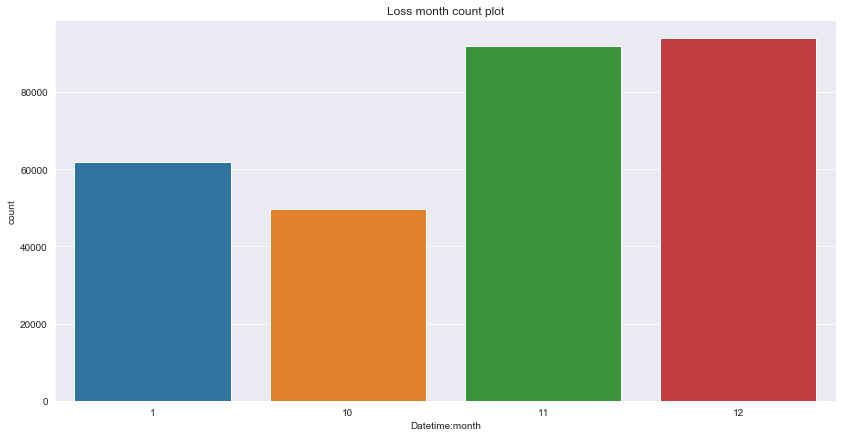

In [455]:
# Loss month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Datetime:month', data = train)
plt.title('Loss month count plot')
plt.show()

- The only months available in the train set include *Jan, Oct, Nov and Dec*
- March has the least number of observations in the dataset while December has the highest number of observations

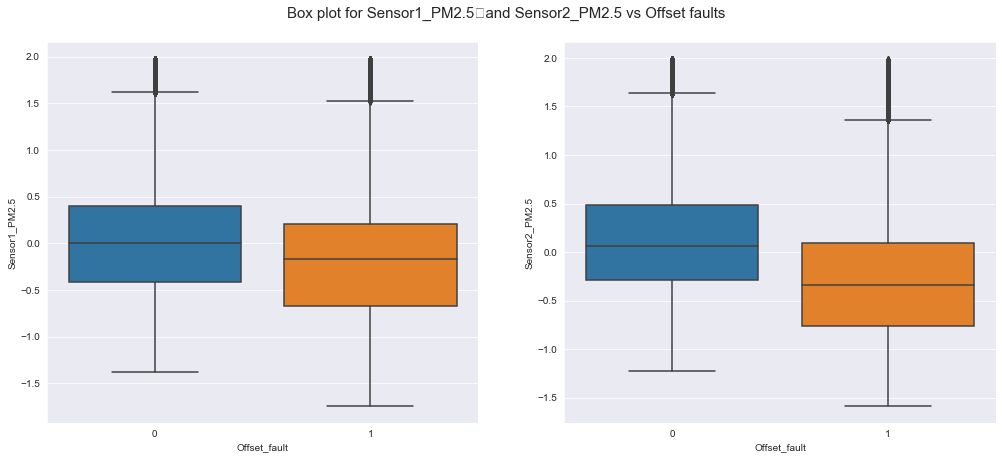

In [456]:
# Box plots for Sensor1_PM2.5	and Sensor2_PM2.5 vs Offset faults
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 7))
fig.suptitle('Box plot for Sensor1_PM2.5	and Sensor2_PM2.5 vs Offset faults', y= 0.95, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5', 'Sensor2_PM2.5']):
  sns.boxplot(train.Offset_fault, train[name], ax= ax)

<a name="Correlations"></a>
## 8. Correlations - EDA

<Figure size 1440x864 with 0 Axes>

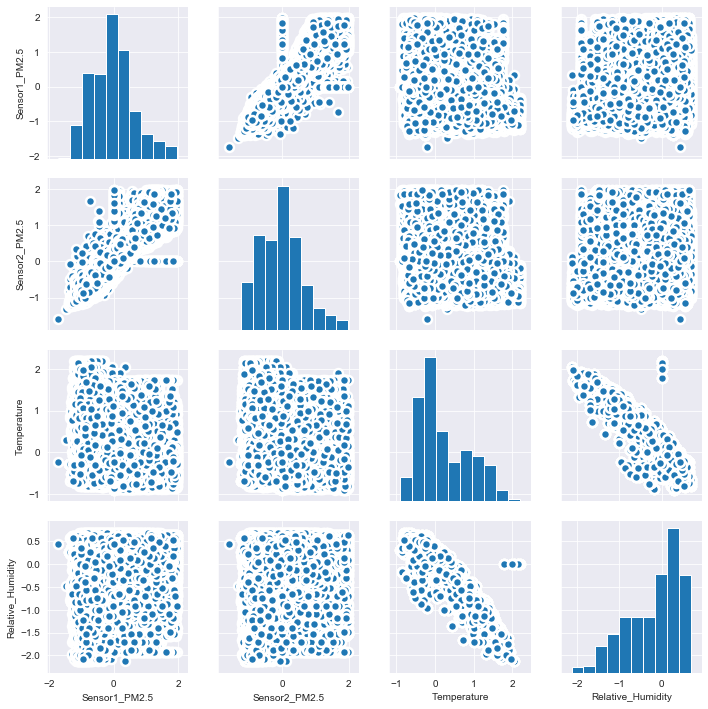

In [457]:
# Type of correlations 
plt.figure(figsize = (20, 12))
num_cols = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity']
sns.pairplot(train[num_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

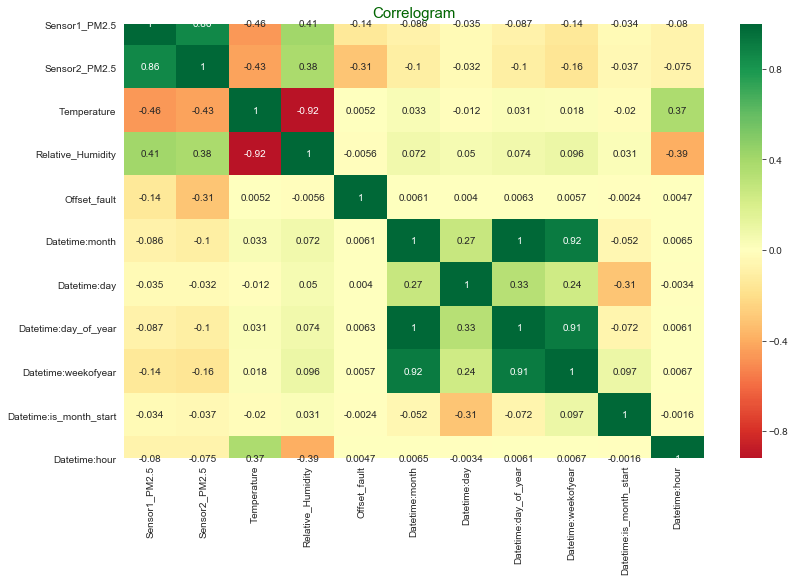

In [458]:
# Quantify correlations
corr = train.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [459]:
train.corr()['Offset_fault'].sort_values(ascending=False)

Offset_fault               1.00000
Datetime:day_of_year       0.00626
Datetime:month             0.00612
Datetime:weekofyear        0.00566
Temperature                0.00518
Datetime:hour              0.00471
Datetime:day               0.00397
Datetime:is_month_start   -0.00241
Relative_Humidity         -0.00563
Sensor1_PM2.5             -0.14224
Sensor2_PM2.5             -0.30912
Name: Offset_fault, dtype: float64

<a name="Modelling"></a>
## 10.  Modelling

In [460]:
for col in train.columns:
    print(col)

ID
Sensor1_PM2.5
Sensor2_PM2.5
Temperature
Relative_Humidity
Offset_fault
Datetime:month
Datetime:day
Datetime:day_of_year
Datetime:weekofyear
Datetime:is_month_start
Datetime:hour


In [461]:
# Selecting the independent variables and the target variable
train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5','Temperature','Relative_Humidity',\
 'Datetime:month','Datetime:day_of_year','Datetime:weekofyear','Datetime:hour','Datetime:day']

X = train[train_feats]
y = train.Offset_fault

In [462]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [463]:
# Instantiating the model
clf = RandomForestClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.7471566054243219


              precision    recall  f1-score   support

           0       0.75      0.90      0.82     55966
           1       0.74      0.49      0.59     33188

    accuracy                           0.75     89154
   macro avg       0.75      0.70      0.70     89154
weighted avg       0.75      0.75      0.73     89154



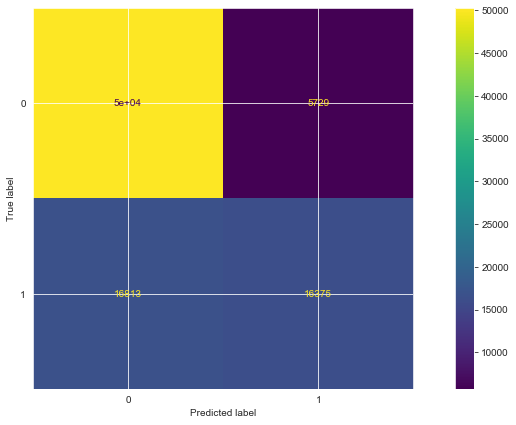

In [464]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

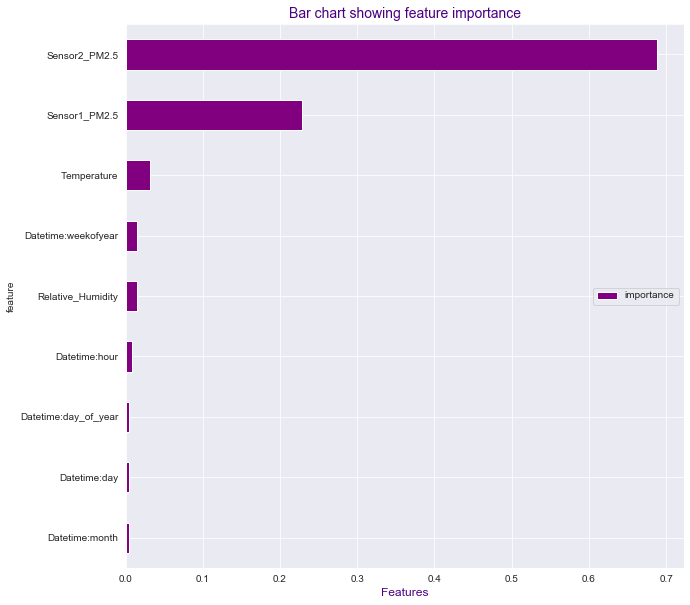

In [465]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

<a name="Predictions"></a>
## 11. Making predictions of the test set and creating a submission file

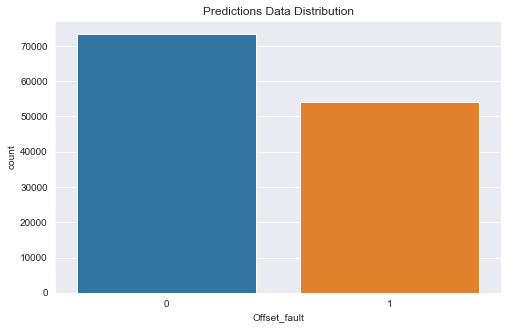

In [466]:
# Make prediction on the test set
test_df = test[train_feats]
predictions = clf.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

 - Majority of the model predictions are 0

In [467]:
# Create file
sub_file.to_csv('submissions/4th_submission.csv', index = False)

<a name="Tips"></a>
##12. TO DOs

1. Generate more features, you can work on aggregating the columns( e.g mean temperature , mean humidity  etc)
2. For the datetime you can generate more features, day of the week, week of the year ...
3. Perform more EDA to get a better Understanding of the data, 
4. Try other classifier models
5. Experiment with different startegies of handling the missing values




## ALL THE BEST! 

In [476]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [486]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [487]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)


In [488]:
# DECISION TREE MODEL 2
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [489]:
tree_model = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=100)

In [490]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[52983  2983]
 [ 3495 29693]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     55966
           1       0.91      0.89      0.90     33188

    accuracy                           0.93     89154
   macro avg       0.92      0.92      0.92     89154
weighted avg       0.93      0.93      0.93     89154
 

AUC-ROC
0.9764444060332761


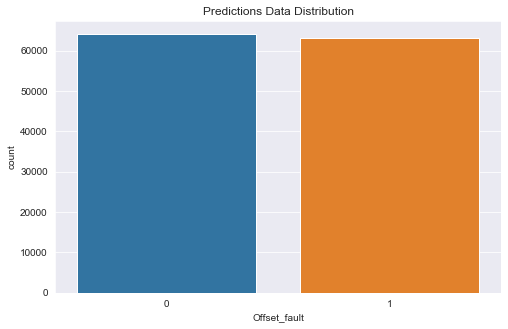

In [493]:
# Make prediction on the test set
test_df = test[train_feats]
my_predictions = clf_DT.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = my_predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [494]:
# Create file
sub_file.to_csv('submissions/Last_submission.csv', index = False)

In [495]:
sub_file.head()

ID  Offset_fault
0  ID_STL3V9B2OU12             0
1  ID_U2EKAY4SGA94             1
2  ID_UJFLEWQR0U4N             0
3  ID_S2C2GPGA4R5I             0
4  ID_5V2C2ZL221H8             1

In [496]:
# /////////////////////////////////////////////////////////////////////////////////////////////////////////

In [498]:
from catboost import CatBoostClassifier
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
fold=StratifiedKFold(n_splits=10)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2  = CatBoostClassifier(n_estimators=800,eval_metric='Accuracy',od_wait=200, learning_rate=0.2,
                              bootstrap_type='Bernoulli',metric_period=100,max_depth = 8,
                     use_best_model=True)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=100,)
    preds=m2.predict(X_test)
    print("Accuracy: ",(accuracy_score(y_test,preds)))
    errcb2.append((accuracy_score(y_test,preds)))
    p2 = m2.predict(test_df)
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 0.7761003	test: 0.7761003	test1: 0.7762299	best: 0.7762299 (0)	total: 127ms	remaining: 1m 41s
100:	learn: 0.9499213	test: 0.9499213	test1: 0.9503668	best: 0.9503668 (100)	total: 7.56s	remaining: 52.4s
200:	learn: 0.9610295	test: 0.9610295	test1: 0.9596541	best: 0.9596541 (199)	total: 14.2s	remaining: 42.3s
300:	learn: 0.9661144	test: 0.9661144	test1: 0.9622115	best: 0.9622115 (300)	total: 20.9s	remaining: 34.7s
400:	learn: 0.9691130	test: 0.9691130	test1: 0.9649371	best: 0.9649371 (400)	total: 27.5s	remaining: 27.4s
500:	learn: 0.9715283	test: 0.9715283	test1: 0.9666532	best: 0.9667205 (499)	total: 34.3s	remaining: 20.4s
600:	learn: 0.9736296	test: 0.9736296	test1: 0.9681001	best: 0.9681338 (598)	total: 40.8s	remaining: 13.5s
700:	learn: 0.9748896	test: 0.9748896	test1: 0.9689414	best: 0.9689414 (700)	total: 47.4s	remaining: 6.7s
799:	learn: 0.9760973	test: 0.9760973	test1: 0.9693788	best: 0.9694125 (797)	total: 53.8s	remaining: 0us

bestTest = 0.9694124773
bestIteration = 79

0:	learn: 0.7779921	test: 0.7779921	test1: 0.7763308	best: 0.7763308 (0)	total: 140ms	remaining: 1m 51s
100:	learn: 0.9509794	test: 0.9509794	test1: 0.9494582	best: 0.9495592 (99)	total: 6.73s	remaining: 46.6s
200:	learn: 0.9611118	test: 0.9611118	test1: 0.9582744	best: 0.9582744 (200)	total: 13.4s	remaining: 40s
300:	learn: 0.9664248	test: 0.9664248	test1: 0.9631873	best: 0.9631873 (300)	total: 20s	remaining: 33.2s
400:	learn: 0.9696514	test: 0.9696514	test1: 0.9648361	best: 0.9648698 (399)	total: 26.6s	remaining: 26.5s
500:	learn: 0.9718462	test: 0.9718462	test1: 0.9665186	best: 0.9665186 (500)	total: 33.4s	remaining: 20s
600:	learn: 0.9737792	test: 0.9737792	test1: 0.9671243	best: 0.9671243 (565)	total: 40.2s	remaining: 13.3s
700:	learn: 0.9751439	test: 0.9751439	test1: 0.9677300	best: 0.9677636 (693)	total: 46.9s	remaining: 6.62s
799:	learn: 0.9765534	test: 0.9765534	test1: 0.9679992	best: 0.9682684 (785)	total: 54.2s	remaining: 0us

bestTest = 0.9682683895
bestIteration = 785

Shr

0:	learn: 0.7790241	test: 0.7790241	test1: 0.7803015	best: 0.7803015 (0)	total: 62.3ms	remaining: 49.8s
100:	learn: 0.9506279	test: 0.9506279	test1: 0.9508379	best: 0.9508379 (98)	total: 7.46s	remaining: 51.6s
200:	learn: 0.9602818	test: 0.9602818	test1: 0.9587455	best: 0.9588128 (197)	total: 14.3s	remaining: 42.5s
300:	learn: 0.9657592	test: 0.9657592	test1: 0.9624470	best: 0.9625143 (298)	total: 21.1s	remaining: 34.9s
400:	learn: 0.9693299	test: 0.9693299	test1: 0.9646006	best: 0.9646006 (400)	total: 29.2s	remaining: 29s
500:	learn: 0.9716555	test: 0.9716555	test1: 0.9662494	best: 0.9662494 (500)	total: 36.6s	remaining: 21.8s
600:	learn: 0.9736782	test: 0.9736782	test1: 0.9670907	best: 0.9671243 (584)	total: 42.6s	remaining: 14.1s
700:	learn: 0.9750878	test: 0.9750878	test1: 0.9676290	best: 0.9678982 (669)	total: 49.2s	remaining: 6.95s
799:	learn: 0.9763403	test: 0.9763403	test1: 0.9681674	best: 0.9683357 (793)	total: 55.8s	remaining: 0us

bestTest = 0.9683356888
bestIteration = 793


0:	learn: 0.7719015	test: 0.7719015	test1: 0.7715189	best: 0.7715189 (0)	total: 191ms	remaining: 2m 32s
100:	learn: 0.9501830	test: 0.9501830	test1: 0.9471364	best: 0.9471364 (100)	total: 6.99s	remaining: 48.4s
200:	learn: 0.9605697	test: 0.9605697	test1: 0.9569285	best: 0.9569285 (200)	total: 14.7s	remaining: 43.9s
300:	learn: 0.9657630	test: 0.9657630	test1: 0.9611347	best: 0.9613366 (284)	total: 21.5s	remaining: 35.7s
400:	learn: 0.9690869	test: 0.9690869	test1: 0.9640285	best: 0.9640285 (399)	total: 28.7s	remaining: 28.6s
500:	learn: 0.9715770	test: 0.9715770	test1: 0.9653409	best: 0.9654755 (485)	total: 35.5s	remaining: 21.2s
600:	learn: 0.9734165	test: 0.9734165	test1: 0.9663504	best: 0.9664513 (585)	total: 42.3s	remaining: 14s
700:	learn: 0.9747774	test: 0.9747774	test1: 0.9670234	best: 0.9670907 (696)	total: 49s	remaining: 6.92s
799:	learn: 0.9761347	test: 0.9761347	test1: 0.9673262	best: 0.9674944 (753)	total: 55.7s	remaining: 0us

bestTest = 0.9674944478
bestIteration = 753



0:	learn: 0.7380234	test: 0.7380234	test1: 0.7408978	best: 0.7408978 (0)	total: 66.9ms	remaining: 53.4s
100:	learn: 0.9497717	test: 0.9497717	test1: 0.9494246	best: 0.9495928 (99)	total: 7.1s	remaining: 49.1s
200:	learn: 0.9605435	test: 0.9605435	test1: 0.9569621	best: 0.9572986 (194)	total: 13.9s	remaining: 41.4s
300:	learn: 0.9656359	test: 0.9656359	test1: 0.9611683	best: 0.9611683 (300)	total: 23.9s	remaining: 39.7s
400:	learn: 0.9691728	test: 0.9691728	test1: 0.9632546	best: 0.9634565 (396)	total: 31.8s	remaining: 31.6s
500:	learn: 0.9715134	test: 0.9715134	test1: 0.9642641	best: 0.9642641 (497)	total: 39.6s	remaining: 23.7s
600:	learn: 0.9734651	test: 0.9734651	test1: 0.9655091	best: 0.9655091 (600)	total: 46.7s	remaining: 15.5s
700:	learn: 0.9752037	test: 0.9752037	test1: 0.9665186	best: 0.9666532 (694)	total: 53.6s	remaining: 7.57s
799:	learn: 0.9765048	test: 0.9765048	test1: 0.9669897	best: 0.9672589 (793)	total: 1m	remaining: 0us

bestTest = 0.9672589003
bestIteration = 793

S

0:	learn: 0.7761900	test: 0.7761900	test1: 0.7831281	best: 0.7831281 (0)	total: 102ms	remaining: 1m 21s
100:	learn: 0.9506317	test: 0.9506317	test1: 0.9461942	best: 0.9461942 (100)	total: 7.35s	remaining: 50.9s
200:	learn: 0.9608837	test: 0.9608837	test1: 0.9566929	best: 0.9566929 (200)	total: 14.2s	remaining: 42.3s
300:	learn: 0.9660359	test: 0.9660359	test1: 0.9613702	best: 0.9613702 (299)	total: 20.7s	remaining: 34.4s
400:	learn: 0.9692028	test: 0.9692028	test1: 0.9634901	best: 0.9635238 (388)	total: 27.4s	remaining: 27.3s
500:	learn: 0.9716293	test: 0.9716293	test1: 0.9655764	best: 0.9657110 (482)	total: 34.3s	remaining: 20.5s
600:	learn: 0.9735324	test: 0.9735324	test1: 0.9667205	best: 0.9669224 (592)	total: 41.4s	remaining: 13.7s
700:	learn: 0.9748634	test: 0.9748634	test1: 0.9678982	best: 0.9679655 (698)	total: 49.4s	remaining: 6.97s
799:	learn: 0.9760898	test: 0.9760898	test1: 0.9685039	best: 0.9687058 (792)	total: 55.9s	remaining: 0us

bestTest = 0.9687058348
bestIteration = 7

0:	learn: 0.7782800	test: 0.7782800	test1: 0.7776768	best: 0.7776768 (0)	total: 101ms	remaining: 1m 20s
100:	learn: 0.9505644	test: 0.9505644	test1: 0.9499966	best: 0.9500303 (98)	total: 6.6s	remaining: 45.7s
200:	learn: 0.9609361	test: 0.9609361	test1: 0.9590820	best: 0.9590820 (200)	total: 13s	remaining: 38.8s
300:	learn: 0.9662602	test: 0.9662602	test1: 0.9633555	best: 0.9634565 (299)	total: 19.5s	remaining: 32.4s
400:	learn: 0.9693112	test: 0.9693112	test1: 0.9657783	best: 0.9658793 (396)	total: 25.9s	remaining: 25.7s
500:	learn: 0.9718275	test: 0.9718275	test1: 0.9669561	best: 0.9669897 (464)	total: 32.6s	remaining: 19.5s
600:	learn: 0.9735548	test: 0.9735548	test1: 0.9677300	best: 0.9679992 (571)	total: 38.8s	remaining: 12.8s
700:	learn: 0.9748560	test: 0.9748560	test1: 0.9681001	best: 0.9683693 (690)	total: 45s	remaining: 6.36s
799:	learn: 0.9761047	test: 0.9761047	test1: 0.9685712	best: 0.9685712 (799)	total: 51.1s	remaining: 0us

bestTest = 0.9685712363
bestIteration = 799

Ac

0:	learn: 0.7718500	test: 0.7718500	test1: 0.7694249	best: 0.7694249 (0)	total: 164ms	remaining: 2m 11s
100:	learn: 0.9506468	test: 0.9506468	test1: 0.9464953	best: 0.9467645 (99)	total: 6.41s	remaining: 44.4s
200:	learn: 0.9612503	test: 0.9612503	test1: 0.9560184	best: 0.9560184 (200)	total: 12.8s	remaining: 38.3s
300:	learn: 0.9663127	test: 0.9663127	test1: 0.9595854	best: 0.9597200 (291)	total: 19s	remaining: 31.5s
400:	learn: 0.9694459	test: 0.9694459	test1: 0.9613353	best: 0.9613689 (399)	total: 25.6s	remaining: 25.5s
500:	learn: 0.9719771	test: 0.9719771	test1: 0.9629168	best: 0.9630515 (496)	total: 32.6s	remaining: 19.4s
600:	learn: 0.9738391	test: 0.9738391	test1: 0.9637918	best: 0.9642629 (588)	total: 40.4s	remaining: 13.4s
700:	learn: 0.9752711	test: 0.9752711	test1: 0.9646330	best: 0.9648013 (683)	total: 46.8s	remaining: 6.61s
799:	learn: 0.9764413	test: 0.9764413	test1: 0.9653734	best: 0.9653734 (799)	total: 53.2s	remaining: 0us

bestTest = 0.9653733553
bestIteration = 799


0:	learn: 0.7721790	test: 0.7721790	test1: 0.7715786	best: 0.7715786 (0)	total: 162ms	remaining: 2m 9s
100:	learn: 0.9505945	test: 0.9505945	test1: 0.9495575	best: 0.9498603 (97)	total: 6.98s	remaining: 48.3s
200:	learn: 0.9610147	test: 0.9610147	test1: 0.9582057	best: 0.9582057 (200)	total: 13.8s	remaining: 41.2s
300:	learn: 0.9661819	test: 0.9661819	test1: 0.9623111	best: 0.9623111 (300)	total: 20.6s	remaining: 34.1s
400:	learn: 0.9691281	test: 0.9691281	test1: 0.9647003	best: 0.9647003 (398)	total: 27.4s	remaining: 27.2s
500:	learn: 0.9714686	test: 0.9714686	test1: 0.9658108	best: 0.9659118 (492)	total: 34s	remaining: 20.3s
600:	learn: 0.9736035	test: 0.9736035	test1: 0.9665175	best: 0.9665848 (593)	total: 40.8s	remaining: 13.5s
700:	learn: 0.9753533	test: 0.9753533	test1: 0.9670559	best: 0.9670895 (698)	total: 47.6s	remaining: 6.72s
799:	learn: 0.9765161	test: 0.9765161	test1: 0.9675607	best: 0.9676280 (786)	total: 54s	remaining: 0us

bestTest = 0.9676279571
bestIteration = 786

Sh

0:	learn: 0.7747551	test: 0.7747551	test1: 0.7728909	best: 0.7728909 (0)	total: 56.6ms	remaining: 45.2s
100:	learn: 0.9512899	test: 0.9512899	test1: 0.9492546	best: 0.9492546 (100)	total: 6.8s	remaining: 47.1s
200:	learn: 0.9610783	test: 0.9610783	test1: 0.9585086	best: 0.9585086 (200)	total: 13.7s	remaining: 40.9s
300:	learn: 0.9659314	test: 0.9659314	test1: 0.9620756	best: 0.9624121 (282)	total: 20.5s	remaining: 34s
400:	learn: 0.9693898	test: 0.9693898	test1: 0.9644648	best: 0.9644648 (386)	total: 27.4s	remaining: 27.3s
500:	learn: 0.9717341	test: 0.9717341	test1: 0.9653734	best: 0.9657772 (448)	total: 34.1s	remaining: 20.4s
600:	learn: 0.9738241	test: 0.9738241	test1: 0.9663156	best: 0.9665511 (550)	total: 40.8s	remaining: 13.5s
700:	learn: 0.9754131	test: 0.9754131	test1: 0.9669549	best: 0.9669886 (647)	total: 47.5s	remaining: 6.71s
799:	learn: 0.9766844	test: 0.9766844	test1: 0.9680318	best: 0.9680318 (798)	total: 54.1s	remaining: 0us

bestTest = 0.9680317663
bestIteration = 798


0.9679080053606525

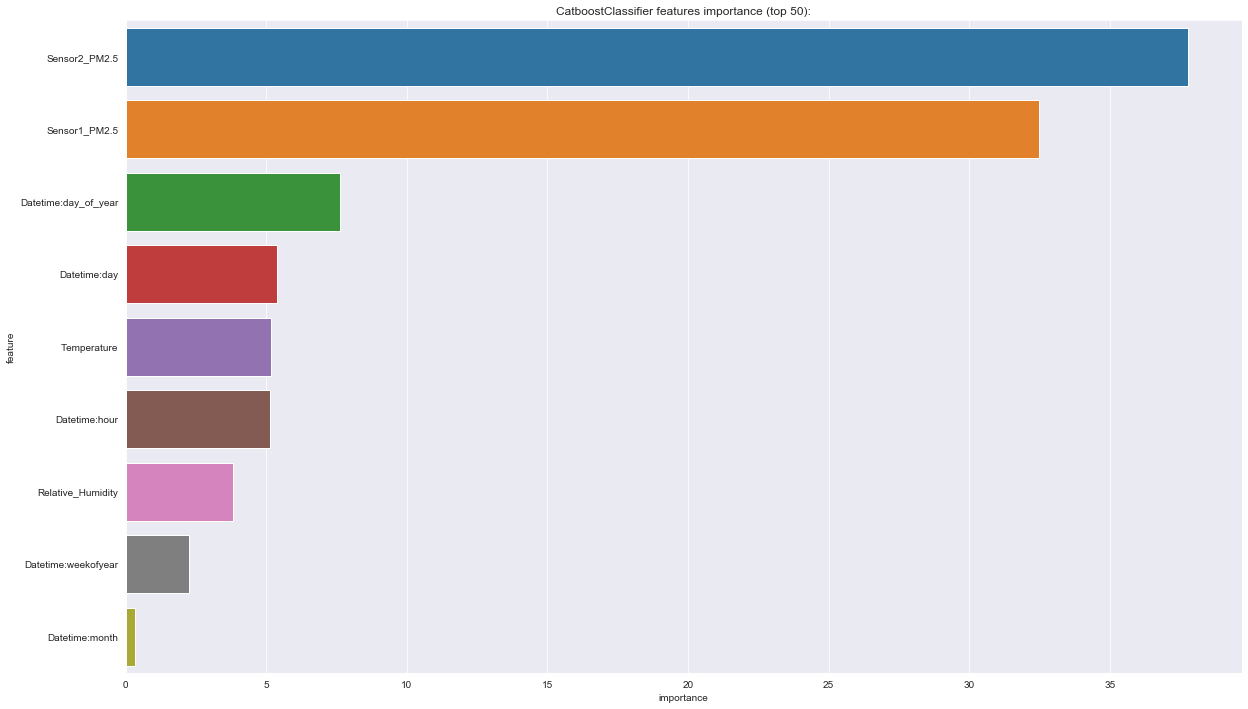

In [499]:
#0.984
feature_importance_df = pd.DataFrame(m2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatboostClassifier features importance (top 50):');

In [514]:
cat_predictions = pd.DataFrame(y_pred_totcb2)

In [515]:
cat_predictions = np.where(np.mean(cat_predictions,axis=0)> 0.45, 1, 0)

In [516]:
cat_predictions = cat_predictions.T
cat_predictions

array([0, 1, 0, ..., 0, 1, 1])

In [517]:
sub = cat_predictions

In [521]:
sum(sub)

69247

In [522]:
samplesubmission.Offset_fault = sub

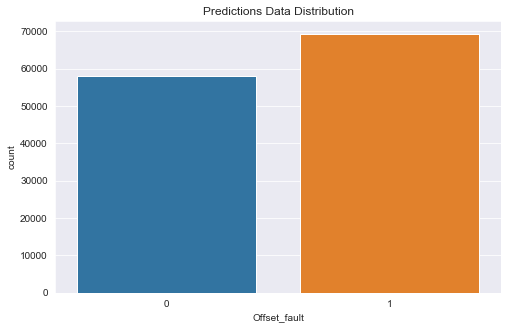

In [527]:
# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(samplesubmission.Offset_fault)
plt.title('Predictions Data Distribution');

In [533]:
# Create file
samplesubmission.to_csv('submissions/cat_boost_submission.csv', index = False)

In [534]:
samplesubmission

ID  Offset_fault
0       ID_STL3V9B2OU12             0
1       ID_U2EKAY4SGA94             1
2       ID_UJFLEWQR0U4N             0
3       ID_S2C2GPGA4R5I             0
4       ID_5V2C2ZL221H8             1
...                 ...           ...
127356  ID_HNCS9Q2GNCQB             0
127357  ID_GIIQYTE11L3H             1
127358  ID_EC7F1P4GXKCL             0
127359  ID_J64RVG2BRAG0             1
127360  ID_7ABZNHCIVVAV             1

[127361 rows x 2 columns]